In [83]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix #,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [16]:
df = load_iris()
x = pd.DataFrame(df.data,columns=df.feature_names)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
y = pd.Series(df.target)
y.value_counts()

2    50
1    50
0    50
dtype: int64

In [36]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
data = pd.DataFrame(x_scaled,columns=df.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


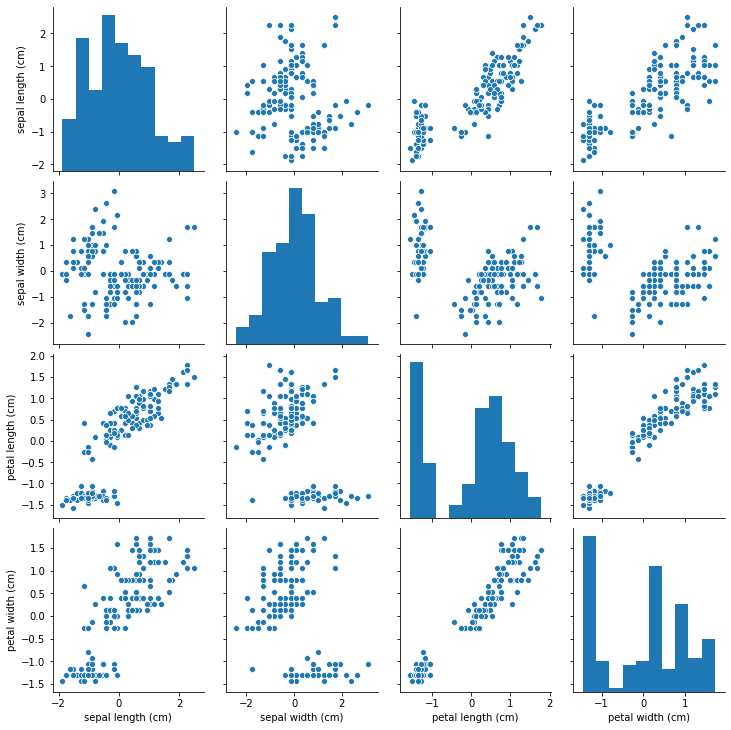

In [42]:
sns.pairplot(data)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [73]:
y_pred = knn.predict(X_test)

In [76]:
print(confusion_matrix(y_test,y_pred))

[[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]


In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [79]:
print(ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)))

In [80]:
## Choosing the optimal K Value

In [81]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

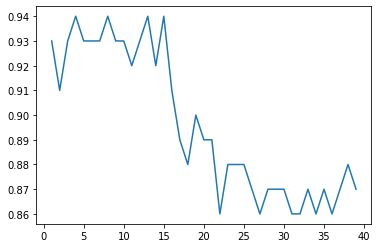

In [106]:
plt.plot(range(1,40),accuracy_rate)

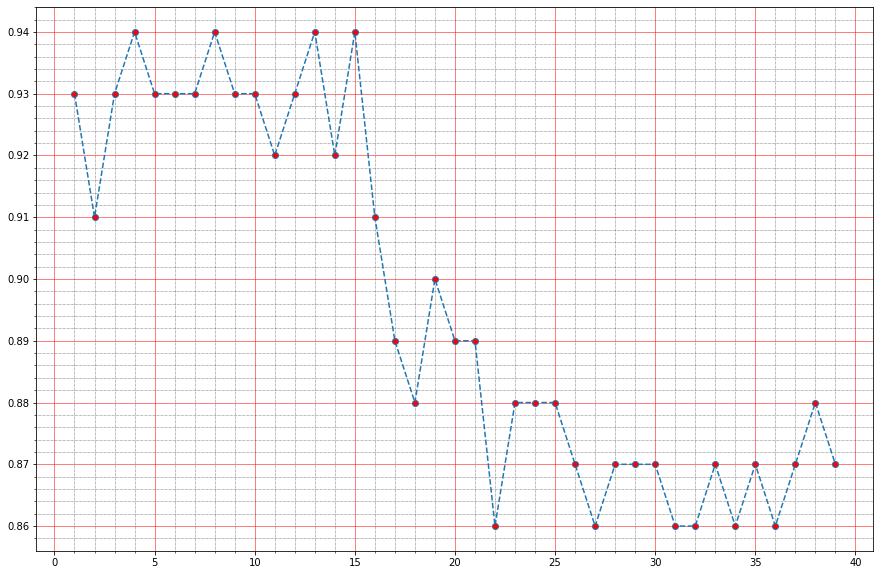

In [110]:
fig, ax = plt.subplots(figsize=(15,10))
#plt.figure(figsize=(15,10))
plt.plot(range(1,40),accuracy_rate, marker='o',linestyle = 'dashed',markerfacecolor = 'red')
ax.grid(which='major',linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.minorticks_on()

In [104]:
## for k = 13

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

